In [6]:
include("BFGS.jl")

BFGS (generic function with 1 method)

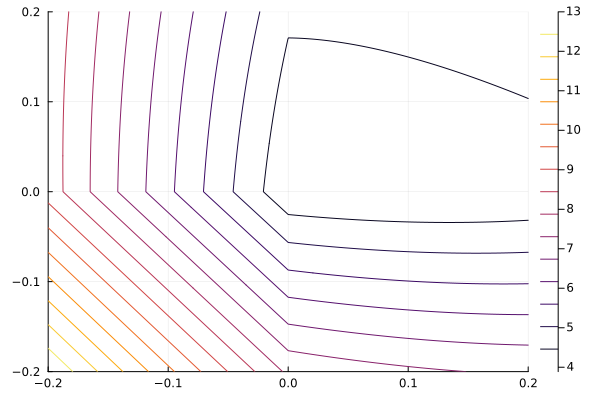

In [2]:
using Plots: contour

TF = function lasso(x::Union{Nothing, AbstractVecOrMat})
    # nondifferentiable lasso example:
    #
    # f( x , y ) = || 3 * x + 2 * y - 2 ||_2^2 + 10 ( | x | + | y | )

    if isnothing(x) # informative call
        v = ( 2 - 1/3 )^2 + 10/9  # optimal solution [ 1/9 , 0 ]
        return (v, [0., 0.], nothing)
    else
        v = (3 * x[1] + 2 * x[2] - 2)^2 +
            10 * (abs(x[1]) + abs(x[2]))  # f(x)

        g = zeros(2)
        g[1] = 18 * x[1] + 12 * x[2] - 12 + 10 * sign(x[1])
        g[2] = 12 * x[1] + 8 * x[2] - 8 + 10 * sign(x[2])

        return (v, g, nothing)
    end
end # lasso

function displayTF(tf, xyrange; levels=nothing)
    f(x, y) = tf([x, y])[1]
    xrange = LinRange(xyrange[1][1], xyrange[2][1], 1000)
    yrange = LinRange(xyrange[1][2], xyrange[2][2], 1000)

    if isnothing(levels)
        plt = contour(xrange, yrange, f)
    else
        plt = contour(xrange, yrange, f, levels=levels)
    end
    return plt
end

plt = displayTF(TF, ([-0.2,-0.2],[0.2,0.2]))

BFGS method
feval	rel gap		|| g(x) ||	ls fev	a*	 rho

   1	2.8571e-02	1.4422e+01	 1 11	2.70e-03 1.73e+00
  13	2.8078e-02	2.8107e+00	 1 61	1.10e-02 2.31e+00
  74	7.7270e-03	1.7391e+01	 1 140	2.71e-14 1.05e+14
 215	7.7270e-03	2.8374e+00	 2	1.11e+00 1.66e+03
 217	6.2564e-03	2.8665e+00	 1	1.00e+00 2.06e+01
 218	2.1697e-15	1.6667e+01	 5	1.52e+00 8.25e+13
 223	0.0000e+00	3.3333e+00	 1  1	1.00e+00 4.95e+14
 224	0.0000e+00	1.6667e+01	 1	1.00e+00 5.94e+14
 225	-2.2839e-16	3.3333e+00	 9  1	2.32e+00 1.53e+15
 234	-2.2839e-16	1.6667e+01	 1	1.00e+00 1.84e+15
 235	-2.2839e-16	3.3333e+00	18  1	6.00e+00 1.84e+15
 253	-2.2839e-16	1.6667e+01	 1	1.00e+00 2.21e+15
 254	-2.2839e-16	3.3333e+00	18  1	6.00e+00 2.21e+15
 272	-2.2839e-16	1.6667e+01	 1	1.00e+00 2.66e+15
 273	-2.2839e-16	3.3333e+00	18  1	6.00e+00 2.66e+15
 291	-2.2839e-16	1.6667e+01	 1	1.00e+00 3.19e+15
 292	-2.2839e-16	3.3333e+00	18  1	6.00e+00 3.19e+15
 310	-2.2839e-16	1.6667e+01	 1	1.00e+00 3.83e+15
 311	-2.2839e-16	3.3333e+00	18  1	6.00e+00 3

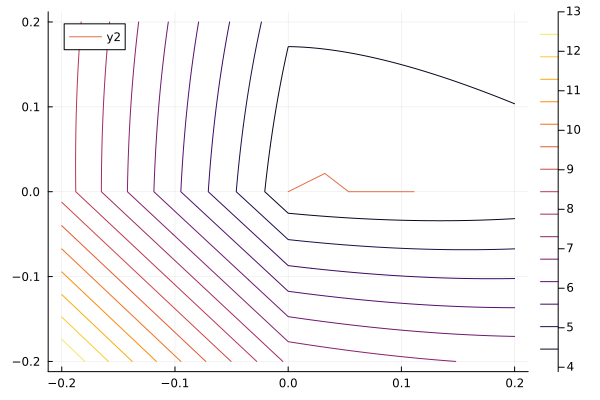

([0.11111111111111112, 4.681205898964361e-18], "error", 3.8888888888888884)

In [7]:
BFGS(TF, plt=plt, Plotf=1, plotatend=true, printing=true)